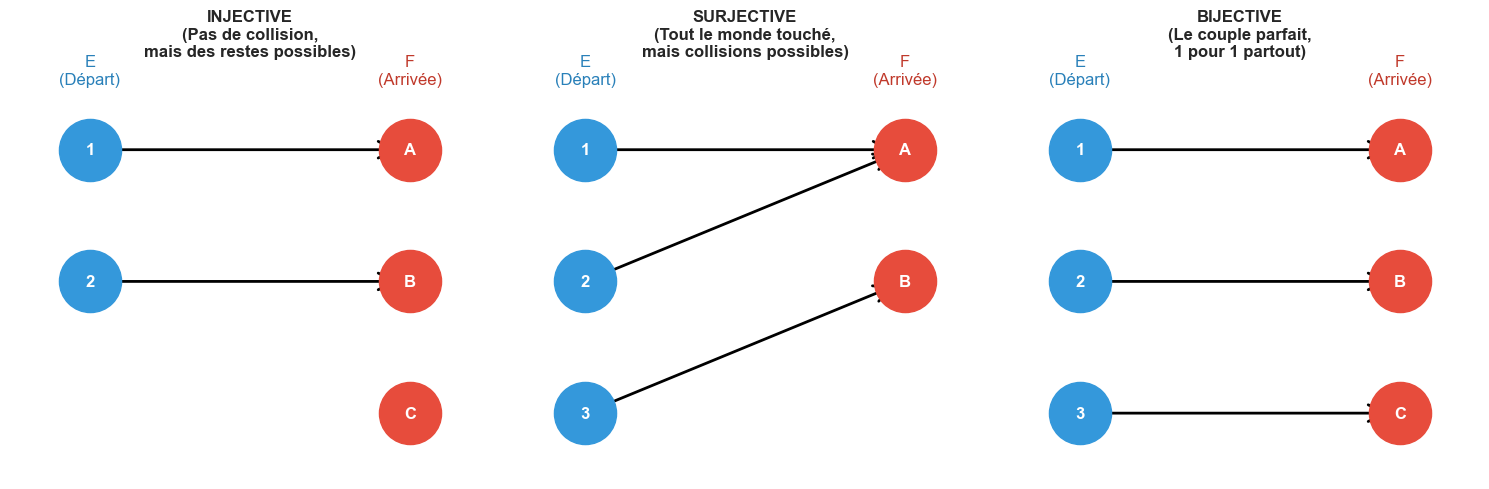

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def visualiser_types_fonctions():
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Configuration des graphes
    types = [
        ("INJECTIVE\n(Pas de collision,\nmais des restes possibles)",
         {'1': 'A', '2': 'B'}, ['1', '2'], ['A', 'B', 'C']), # C est seul

        ("SURJECTIVE\n(Tout le monde touché,\nmais collisions possibles)",
         {'1': 'A', '2': 'A', '3': 'B'}, ['1', '2', '3'], ['A', 'B']), # A touché 2 fois

        ("BIJECTIVE\n(Le couple parfait,\n1 pour 1 partout)",
         {'1': 'A', '2': 'B', '3': 'C'}, ['1', '2', '3'], ['A', 'B', 'C']) # Parfait
    ]

    for ax, (titre, mapping, E, F) in zip(axes, types):
        G = nx.DiGraph()

        # Positionnement des noeuds
        pos = {}
        # Ensemble de départ (Gauche)
        for i, node in enumerate(E):
            G.add_node(node, layer=0)
            pos[node] = (-1, -i)

        # Ensemble d'arrivée (Droite)
        for i, node in enumerate(F):
            G.add_node(node, layer=1)
            pos[node] = (1, -i)

        # Ajouter les flèches
        edges = [(u, v) for u, v in mapping.items()]
        G.add_edges_from(edges)

        # Dessin
        # Noeuds départ
        nx.draw_networkx_nodes(G, pos, nodelist=E, node_color='#3498db', node_size=2000, ax=ax, label='Départ')
        # Noeuds arrivée
        nx.draw_networkx_nodes(G, pos, nodelist=F, node_color='#e74c3c', node_size=2000, ax=ax, label='Arrivée')
        # Labels
        nx.draw_networkx_labels(G, pos, font_color='white', font_weight='bold', ax=ax)
        # Flèches
        nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=30, width=2, ax=ax)

        # Titres et cadre
        ax.set_title(titre, fontsize=12, fontweight='bold', pad=20)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-len(max(E, F, key=len)) + 0.5, 0.5)
        ax.axis('off')

        # Annotations E et F
        ax.text(-1, 0.5, "E\n(Départ)", ha='center', fontsize=12, color='#2980b9')
        ax.text(1, 0.5, "F\n(Arrivée)", ha='center', fontsize=12, color='#c0392b')

    plt.tight_layout()
    plt.show()

visualiser_types_fonctions()